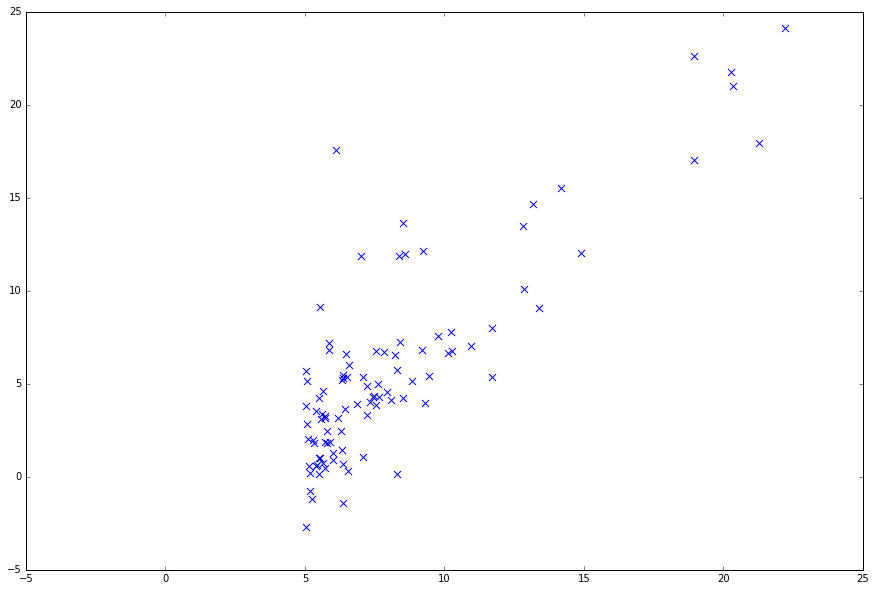

In [1]:
import csv
import matplotlib.pyplot as plt
import random

num_epochs = 5000
learning_rate = 0.01
ax_size = (-5, 25, -5, 25)
data_file_name = '2d_dataset1.csv'
X = []
Y = []
csv_reader = csv.DictReader(open(data_file_name))
for row in csv_reader:
    X.append(float(row['x']))
    Y.append(float(row['y']))

plt.figure(figsize=(15, 10))
plt.axis(ax_size)
plt.scatter(X, Y, marker=('x'), s=50)
plt.show()

In [2]:
xy = zip(X, Y)
random.shuffle(xy)
X, Y = zip(*xy)
split_idx = int(0.8 * len(X))
X_train = X[:split_idx]
Y_train = Y[:split_idx]
X_test = X[split_idx:]
Y_test = Y[split_idx:]

-3.89694709042 1.20096873159
[9.262067301639828, 7.284311994453112, 3.8248014662274272, 2.9578221388907195, 2.237240899935151, 8.396168846161554, 3.070352909040947, 20.531957878904915, 6.331943790300168, 2.8761562651424226, 4.594862616924611, 4.911558071445584, 5.23413827275136, 2.1922045725004278, 6.170653689647279, 6.201278392302892, 3.9668760671748338, 6.063166988169741, 3.89277629643557, 4.771885407961363]


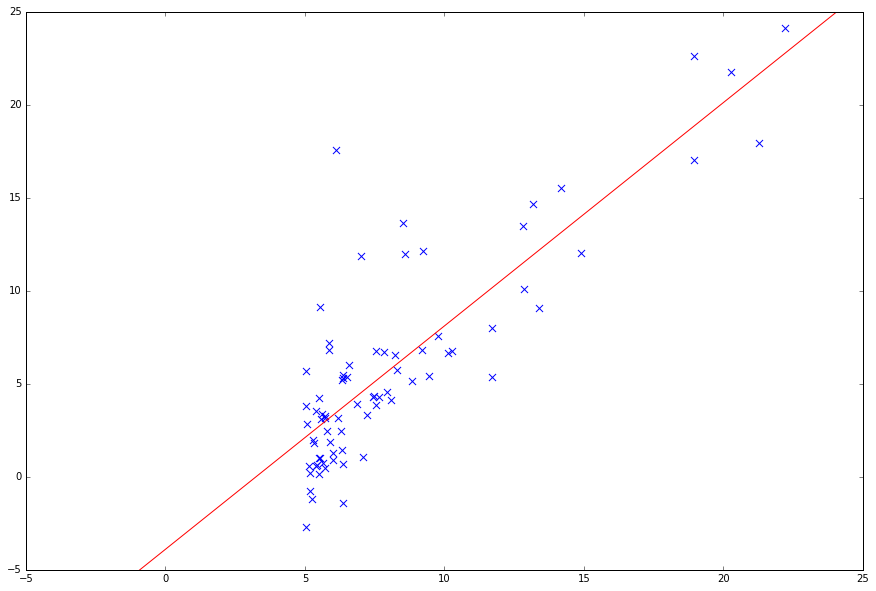

In [3]:
# J(theta) = (0.5 * sum((h(x) - y)**2))/m
# h(x) = mx + c
# the non learning way
x_mean = (sum(X_train) * 1.0)/(len(X_train))
y_mean = (sum(Y_train) * 1.0)/(len(Y_train))
num = 0
den = 0
for i in range(len(X_train)):
    num += (X_train[i] - x_mean) * (Y_train[i] - y_mean)
    den += (X_train[i] - x_mean) * (X_train[i] - x_mean)
m = num/den
c = y_mean - (x_mean * m)
print c, m
x_plt = [-100000, 1000000]
y_plt = [(i * m + c) for i in x_plt]

predictions = [(m * x + c) for x in X_test]
print predictions

plt.figure(figsize=(15, 10))
plt.axis(ax_size)
plt.scatter(X_train, Y_train, marker=('x'), s=50)
plt.plot(x_plt, y_plt, 'r')
plt.show()

[-3.8948437222226926, 1.200760826060301]
[9.261892648920028, 7.2844797205639225, 3.8255680850146194, 2.958738844681688, 2.2382823490455075, 8.39614409333055, 3.0712501340835385, 20.529832240669894, 6.332276385498105, 2.877087108509588, 4.595495926684485, 4.912136556516586, 5.234660914396384, 2.193253818068246, 6.171014206558205, 6.201633607622744, 3.967618090737553, 6.06354611262581, 3.893531147769633, 4.772488072445773]


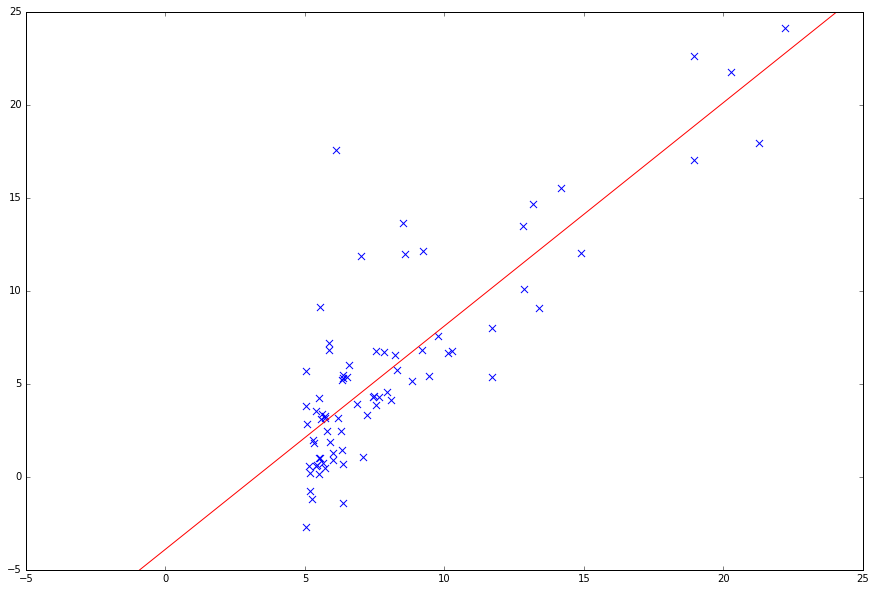

In [4]:
# lets do it with gradient descent
plt.ion()
theta = [0.0, 0.0]
for _ in range(num_epochs):
    cost = 0.0
    theta_grads = [0.0, 0.0]
    for x, y in zip(X_train, Y_train):
        pred = (x * theta[1]) + theta[0]
        cost += ((pred - y) ** 2)
        theta_grads[0] += pred - y
        theta_grads[1] += (pred - y) * x
    cost = cost / (2 * len(X))
    theta[0] -= (learning_rate * (theta_grads[0]/len(X)))
    theta[1] -= (learning_rate * (theta_grads[1]/len(X)))
print theta

predictions = [(theta[1] * x + theta[0]) for x in X_test]
print predictions

y_plt = [(i * theta[1] + theta[0]) for i in x_plt]    
# display.clear_output(wait=True)
# display.display(pl.gcf())
plt.figure(figsize=(15, 10))
plt.axis(ax_size)
plt.scatter(X_train, Y_train, marker=('x'), s=50)
plt.plot(x_plt, y_plt, 'r')
plt.show()